<a href="https://colab.research.google.com/github/hosamfa3096/repositorio_IA3/blob/main/dnn_mnist_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento de un Perceptrón Multi-Capa con datos de dígitos (MNIST)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt
tf.random.set_seed(42)

## Carga de los datos
#### Tamaño del conjunto de entrenamiento y de test

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(' -Entradas Entrenamiento:', X_train.shape)
print(' -Salidas Entrenamiento:', y_train.shape)
print(' -Entradas Test:', X_test.shape)
print(' -Salidas Test:', y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
 -Entradas Entrenamiento: (60000, 28, 28)
 -Salidas Entrenamiento: (60000,)
 -Entradas Test: (10000, 28, 28)
 -Salidas Test: (10000,)


#### Visualización de las entradas

Valores de salida correspondientes a las imágenes de entrada [5 0 4]


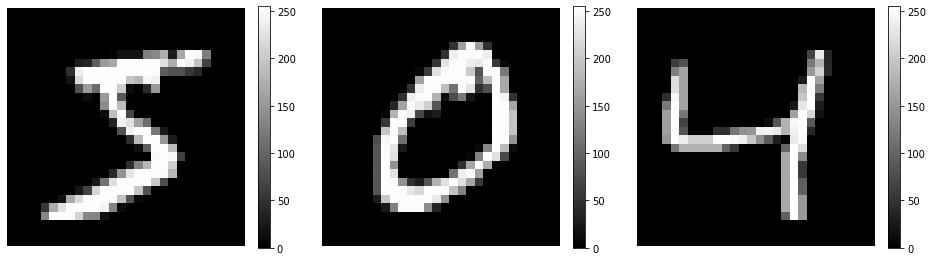

In [3]:
n_img_show = 3

# Plot images
plt.figure(figsize=(16,10))
for i in range(n_img_show):
    plt.subplot(1, n_img_show, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.colorbar(fraction=0.046)
    plt.axis('off');

print(f'Valores de salida correspondientes a las imágenes de entrada {y_train[0:n_img_show]}')

## Preparación de los datos
#### Normalización

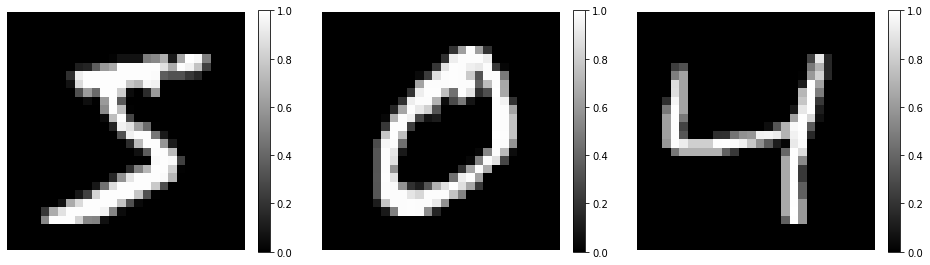

In [4]:
# Normalizamos a valores entre 0 y 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

plt.figure(figsize=(16,10))
for i in range(n_img_show):
    plt.subplot(1, n_img_show, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.colorbar(fraction=0.046)
    plt.axis('off');

#### Reajuste del tamaño de la entrada y la salida

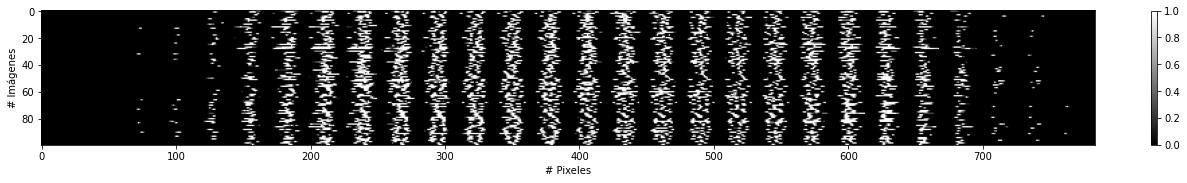

In [5]:
x_shape = X_train.shape
X_train = X_train.reshape(x_shape[0], x_shape[1]*x_shape[2])
X_test = X_test.reshape(len(X_test), x_shape[1]*x_shape[2])
y_train = y_train[:, None]
y_test = y_test[:, None]

# Dibujar la nueva entrada
plt.figure(figsize=(20, 70))
plt.imshow(X_train[0:100], cmap='gray')
plt.xlabel('# Pixeles')
plt.ylabel('# Imágenes')
plt.colorbar(fraction=0.006);

## Definición del modelo
Crea un modelo con las siguientes capas:
1. Capa de entrada con tantas entradas como número de píxeles (784) 
2. Capa oculta con 256 neuronas
3. Capa oculta con 128 neuronas
4. Capa oculta con 64 neuronas
5. Capa oculta con 32 neuronas
6. Capa de salidad con tantas neuronas como salidas (10)

Todas las capas usan función de activación relu (menos la de salida). ¿Qué función de activación hay que poner a la salida?


In [26]:
# Algunos hiper-parámetros
lr = .001
batch_size = 512
n_epochs = 35
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Crear modelo
model = tf.keras.models.Sequential()
model.add(Dense(units= 256, activation= 'relu', input_shape= (X_train.shape[1],)))
model.add(Dense(units= 128, activation= 'relu'))
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dense(units= 32, activation= 'relu'))
model.add(Dense(10, activation=('softmax')))

# Visualizar arquitectura y dimensiones
model.summary()

# Compilamos el modelo: ¿Qué función de coste hay que utilizar?
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento del modelo

In [27]:
hist = model.fit(X_train, 
                 y_train, 
                 batch_size=batch_size, 
                 epochs=n_epochs, 
                 verbose=1, 
                 shuffle=True,
                 validation_data=(X_test, y_test))

Epoch 1/35
118/118 [==============================] - 2s 18ms/step - loss: 0.4873 - accuracy: 0.8602 - val_loss: 0.2053 - val_accuracy: 0.9394
Epoch 2/35
118/118 [==============================] - 2s 17ms/step - loss: 0.1648 - accuracy: 0.9518 - val_loss: 0.1325 - val_accuracy: 0.9601
Epoch 3/35
118/118 [==============================] - 2s 17ms/step - loss: 0.1161 - accuracy: 0.9654 - val_loss: 0.1089 - val_accuracy: 0.9663
Epoch 4/35
118/118 [==============================] - 2s 17ms/step - loss: 0.0831 - accuracy: 0.9751 - val_loss: 0.0922 - val_accuracy: 0.9713
Epoch 5/35
118/118 [==============================] - 2s 16ms/step - loss: 0.0655 - accuracy: 0.9804 - val_loss: 0.0888 - val_accuracy: 0.9728
Epoch 6/35
118/118 [==============================] - 2s 16ms/step - loss: 0.0554 - accuracy: 0.9832 - val_loss: 0.0731 - val_accuracy: 0.9786
Epoch 7/35
118/118 [==============================] - 2s 16ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0788 - val_accuracy: 0.9753

### Dibujar las curvas de entrenamiento/validación

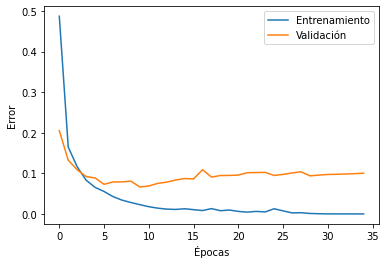

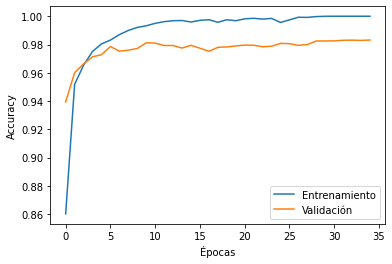

In [28]:
def plot_curves(history):
  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Entrenamiento', 'Validación'])

  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Entrenamiento', 'Validación'], loc='lower right');

plot_curves(hist.history)

### Visualización de los pesos

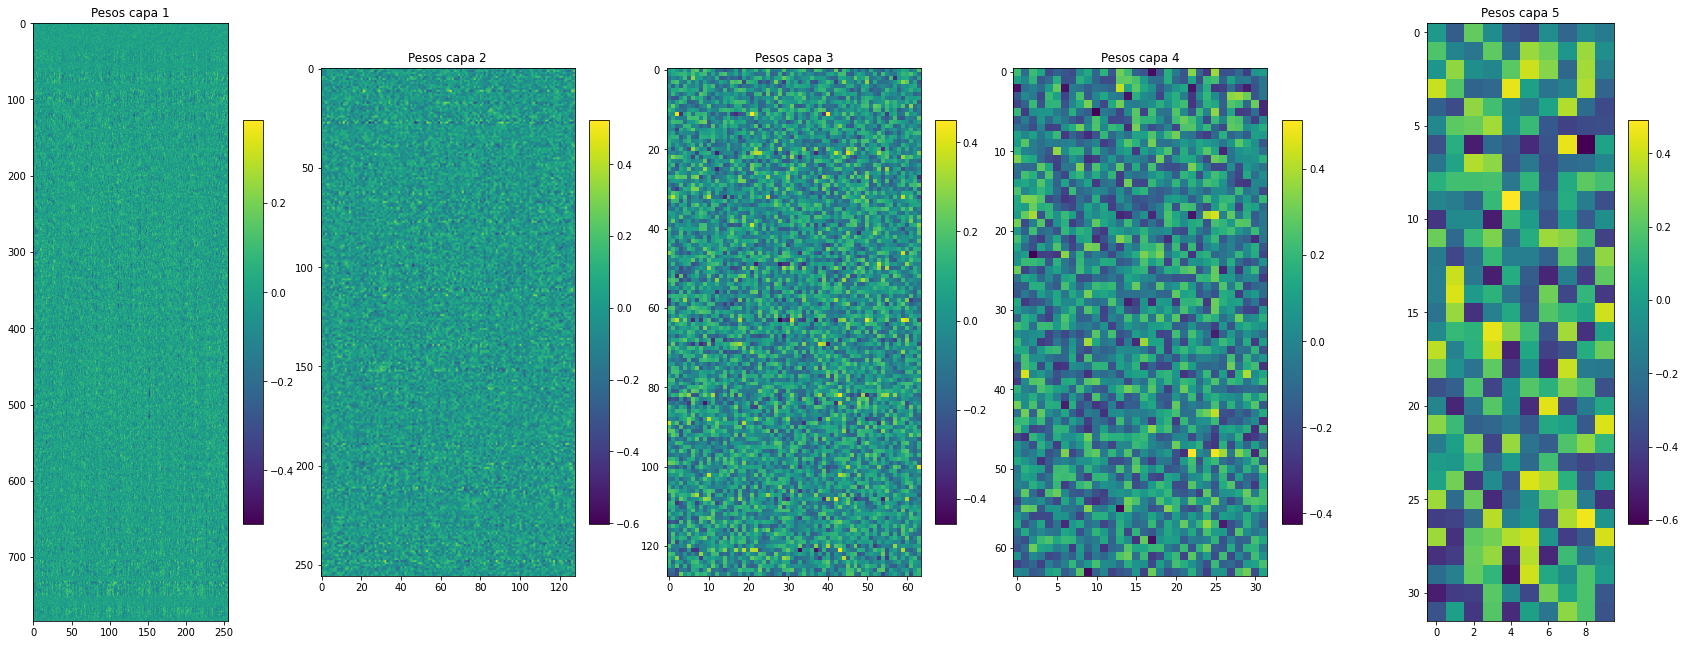

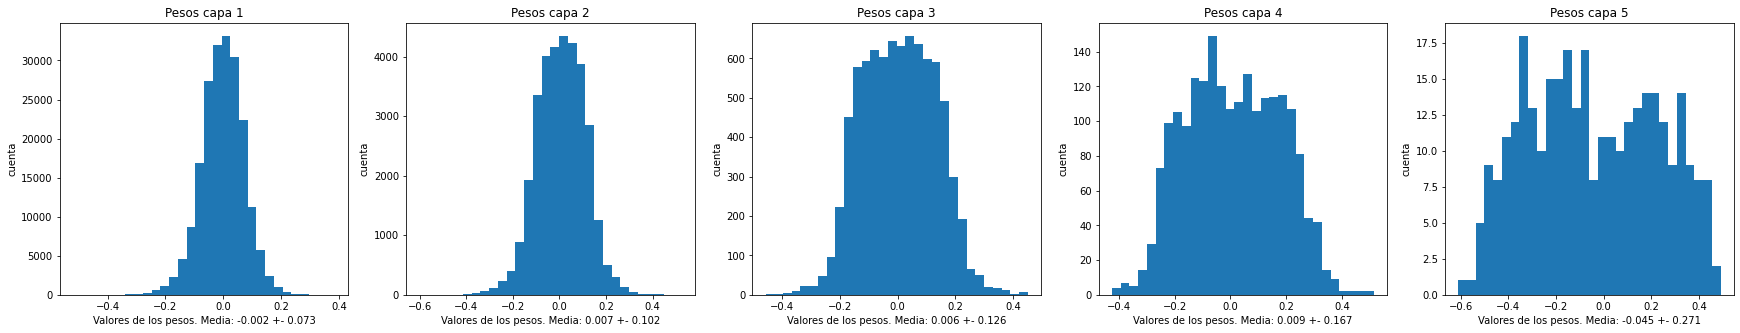

In [29]:
def plot_weights(model):
  layers = [l for l in model.layers if l.name.startswith('dense')]
  n_img_show = len(layers)
  plt.figure(figsize=(30, 11))
  cnt = 1
  for layer in layers:
      plt.subplot(1, n_img_show, cnt)
      plt.imshow(layer.get_weights()[0])
      plt.title(f'Pesos capa {cnt}')
      plt.colorbar(fraction=0.07)
      cnt += 1

def plot_weights_hist(model):
  layers = [l for l in model.layers if l.name.startswith('dense')]
  n_img_show = len(layers)
  plt.figure(figsize=(30, 5))
  cnt = 1
  for layer in layers:
    if layer.name.startswith('dense'):
      plt.subplot(1, n_img_show, cnt)
      plt.hist(layer.get_weights()[0].flatten(), bins=30)
      plt.title(f'Pesos capa {cnt}')
      mean = np.mean(layer.get_weights()[0])
      std = np.std(layer.get_weights()[0])
      plt.xlabel(f'Valores de los pesos. Media: {mean:.3f} +- {std:.3f}')
      plt.ylabel('cuenta')
      cnt +=1

plot_weights(model)
plot_weights_hist(model)

## Regularización del modelo con L2
Crea un modelo nuevo exactamente igual que el anterior y añade regularización L2 en todas las capas (menos en la de salida, como es obvio). Prueba distintos valores (0.1, 0.01 y 0.001) y observa cual es el comportamiento.



In [39]:
tf.keras.backend.clear_session()
n_epochs = 50

# Crear modelo

model_with_l2 = tf.keras.models.Sequential()
model_with_l2.add(Dense(units= 256, activation= 'relu', input_shape= (X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
model_with_l2.add(Dense(units= 128, activation= 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
model_with_l2.add(Dense(units= 64, activation= 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
model_with_l2.add(Dense(units= 32, activation= 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
model_with_l2.add(Dense(10, activation=('softmax')))
# Compilamos el modelo
model_with_l2.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Entrenamos
hist = model_with_l2.fit(X_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=n_epochs,
                         verbose=1,
                         shuffle=True, 
                         validation_data=(X_test, y_test))

Epoch 1/50
118/118 [==============================] - 3s 19ms/step - loss: 0.3449 - accuracy: 0.8972 - val_loss: 0.1449 - val_accuracy: 0.9571
Epoch 2/50
118/118 [==============================] - 2s 18ms/step - loss: 0.1114 - accuracy: 0.9691 - val_loss: 0.1048 - val_accuracy: 0.9710
Epoch 3/50
118/118 [==============================] - 2s 18ms/step - loss: 0.0802 - accuracy: 0.9782 - val_loss: 0.0873 - val_accuracy: 0.9758
Epoch 4/50
118/118 [==============================] - 2s 18ms/step - loss: 0.0592 - accuracy: 0.9848 - val_loss: 0.0875 - val_accuracy: 0.9772
Epoch 5/50
118/118 [==============================] - 2s 18ms/step - loss: 0.0472 - accuracy: 0.9885 - val_loss: 0.0862 - val_accuracy: 0.9780
Epoch 6/50
118/118 [==============================] - 2s 18ms/step - loss: 0.0368 - accuracy: 0.9920 - val_loss: 0.0867 - val_accuracy: 0.9775
Epoch 7/50
118/118 [==============================] - 2s 18ms/step - loss: 0.0304 - accuracy: 0.9941 - val_loss: 0.0865 - val_accuracy: 0.9785

### Evaluación del modelo con regularización L2

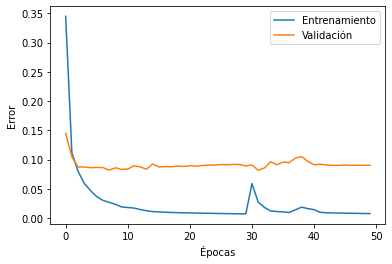

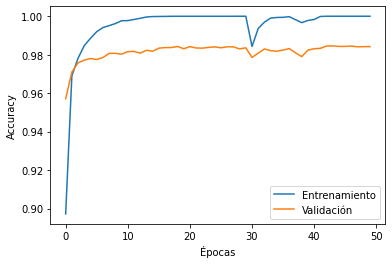

In [40]:
plot_curves(hist.history)

### Visualización de los pesos

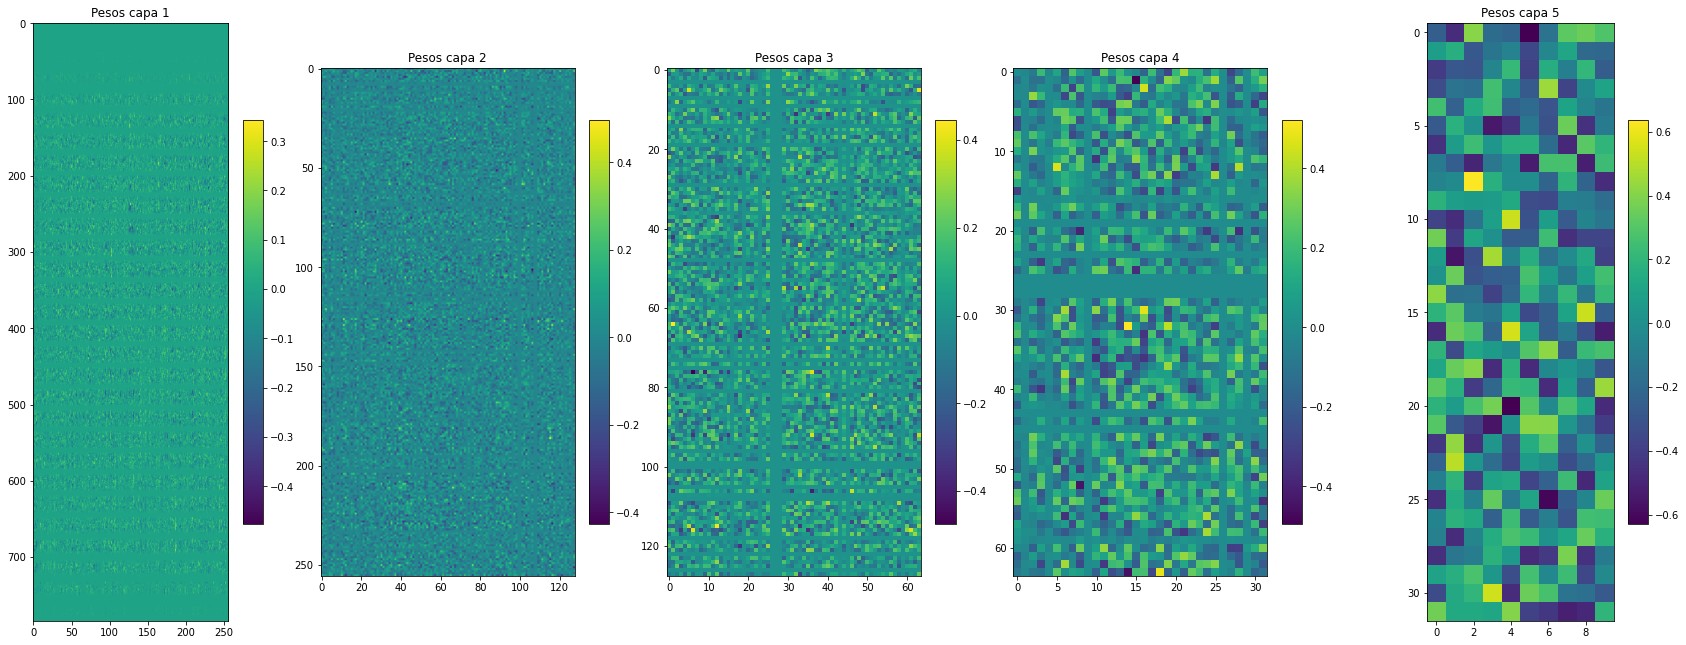

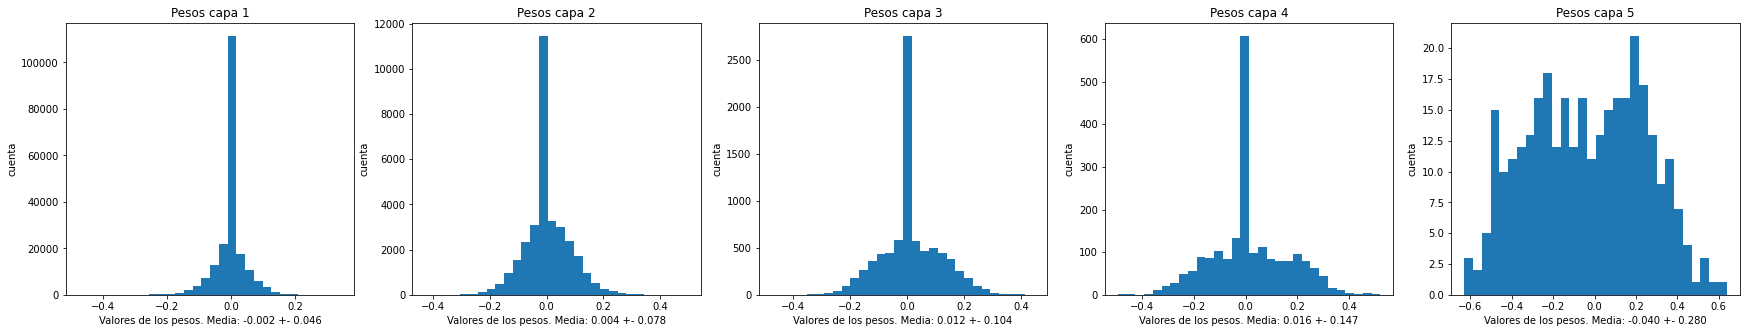

In [41]:
plot_weights(model_with_l2)
plot_weights_hist(model_with_l2)

## Regularización del modelo con Dropout
Ahora crea el mismo modelo pero añade dropout. Prueba distintos valores de dropout.

In [44]:
tf.keras.backend.clear_session()

# Crear modelo
n_epochs = 25
model_with_dp = tf.keras.models.Sequential()
model_with_dp.add(Dense(units= 256, activation= 'relu', input_shape= (X_train.shape[1],)))
model_with_dp.add(Dropout(0.4))
model_with_dp.add(Dense(units= 128, activation= 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
model_with_dp.add(Dropout(0.4))
model_with_dp.add(Dense(units= 64, activation= 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
model_with_dp.add(Dropout(0.4))
model_with_dp.add(Dense(units= 32, activation= 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
model_with_dp.add(Dropout(0.4))
model_with_dp.add(Dense(10, activation=('softmax')))

# Compilamos el modelo
model_with_dp.compile(loss='sparse_categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])

# Entrenamos
hist = model_with_dp.fit(X_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=n_epochs,
                         verbose=1, 
                         shuffle=True, 
                         validation_data=(X_test, y_test))

Epoch 1/25
118/118 [==============================] - 3s 22ms/step - loss: 0.8642 - accuracy: 0.7258 - val_loss: 0.2425 - val_accuracy: 0.9405
Epoch 2/25
118/118 [==============================] - 2s 21ms/step - loss: 0.3738 - accuracy: 0.9093 - val_loss: 0.1773 - val_accuracy: 0.9553
Epoch 3/25
118/118 [==============================] - 2s 21ms/step - loss: 0.2988 - accuracy: 0.9289 - val_loss: 0.1600 - val_accuracy: 0.9616
Epoch 4/25
118/118 [==============================] - 2s 21ms/step - loss: 0.2601 - accuracy: 0.9385 - val_loss: 0.1530 - val_accuracy: 0.9645
Epoch 5/25
118/118 [==============================] - 2s 21ms/step - loss: 0.2363 - accuracy: 0.9454 - val_loss: 0.1393 - val_accuracy: 0.9693
Epoch 6/25
118/118 [==============================] - 2s 20ms/step - loss: 0.2217 - accuracy: 0.9482 - val_loss: 0.1336 - val_accuracy: 0.9691
Epoch 7/25
118/118 [==============================] - 2s 20ms/step - loss: 0.2023 - accuracy: 0.9525 - val_loss: 0.1305 - val_accuracy: 0.9691

### Evaluación del modelo con Dropout

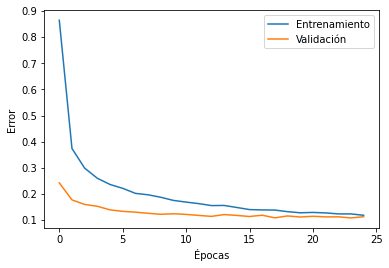

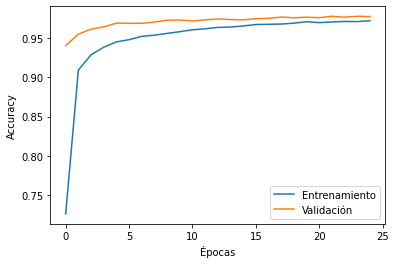

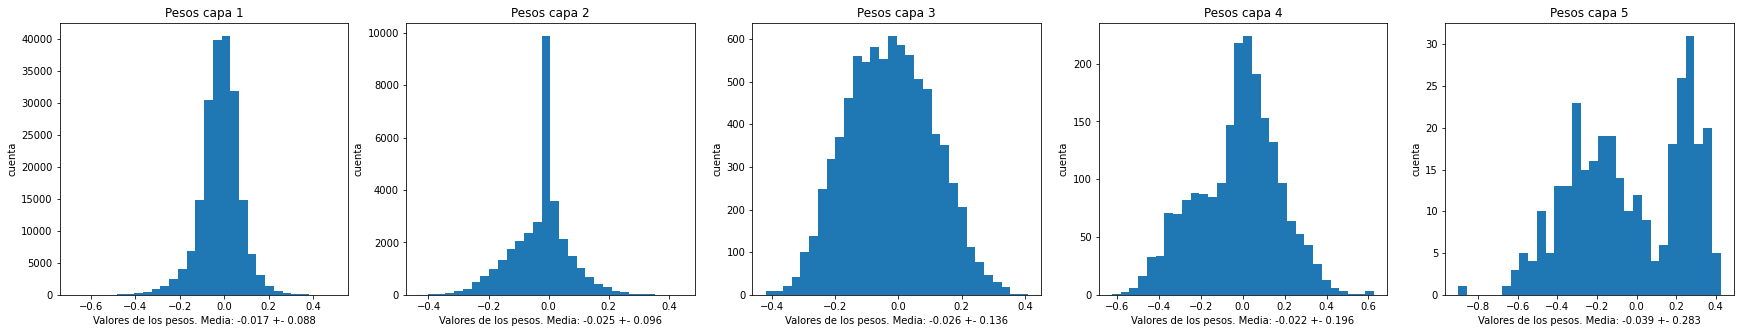

In [45]:
# Plots
plot_curves(hist.history)
# plot_weights(model_with_dp)
plot_weights_hist(model_with_dp)